# 데이터의 불균형 문제에 대한 처리 방법 
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 이상을 정확하게 분류하는 것이 중요
- 보통 이상의 데이터를 target 데이터로 사용하는 경우가 많다.
- 데이터 불균형한 경우 분류의 성능과 target 데이터를 정확하게 분류하는 것에 일지하지 않는 부분이 발생(예측이 떨어진다.)
- 소수의 데이터를 중요도가 낮게 판단이 되서 실제 모델이 해당하는 예측을 적게 발생
- 이러한 경우에는 소수의 데이터를 중가시키는 오버 샘플링, 다수의 데이터에서 일부만 사용하는 언더 샘플링

In [657]:
# 샘플링 라이브러리 설치
#!pip install imbalanced-learn

- 언더 샘플링
    - 다수의 라벨을 가진 데이터를 샘플링하여 소수의 데이터의 수 수준으로 감소 시키는 방법
    - 이 기법은 데이터 불균형 문제에 대한 해결은 되지만 전체 데이터 개수가 감소하여 핛ㅂ의 성능을 떨어뜨릴 수 있다.

In [658]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [659]:
# 랜덤 데이터셋을 생성
# 90:10의 비율로 데이터를 생성

x, y = make_classification(
    n_samples=1000,
    n_classes=2,
    n_features=5,
    weights=[0.9, 0.1]
)

In [660]:
x

array([[ 0.06741176,  1.2485021 ,  1.09217442, -2.52232248, -2.82296312],
       [-0.12467552,  0.53371014,  0.83667099, -0.90247544, -1.3515372 ],
       [-0.71943516,  0.90483231,  0.88386512, -1.78412781, -2.08204596],
       ...,
       [ 0.00331519,  0.61367236,  0.96990815, -1.03393973, -1.5571158 ],
       [-1.33328797,  0.15648314,  1.02332643,  0.10520238, -0.70087039],
       [ 0.52259771, -0.47344292, -0.33189319,  0.99559087,  1.03828315]],
      shape=(1000, 5))

In [661]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [662]:
df = pd.DataFrame(data = x)
df['target'] = y

df.head()

,0,1,2,3,4,target
0,0.067412,1.248502,1.092174,-2.522322,-2.822963,0
1,-0.124676,0.533710,0.836671,-0.902475,-1.351537,0
2,-0.719435,0.904832,0.883865,-1.784128,-2.082046,0
3,-0.883739,0.484562,1.039929,-0.686133,-1.336820,0
4,1.295813,0.664646,0.797581,-1.240026,-1.587445,0


In [663]:
# RandomUnderSampler class 생성
undersampler = RandomUnderSampler()

In [664]:
# undersampler 안에 있는 함수를 호출
x_under, y_under = undersampler.fit_resample(x, y)

In [665]:
under_df = pd.DataFrame(data = x_under)

under_df['target'] = y_under

under_df['target'].value_counts()

target
0    104
1    104
Name: count, dtype: int64

In [666]:
# undersampler에서 데이터 비율을 변경
# class 생성시 비율을 지정
# sampleing_strategy 매개변수 -> 소수의 데이터의 비율을 의미 (다수의 데이터의 개수를 지정)
undersampler2 = RandomUnderSampler(sampling_strategy=0.3)
x_under2, y_under2 = undersampler2.fit_resample(x, y)

In [667]:
Counter(y_under2)

Counter({np.int64(0): 346, np.int64(1): 104})

- 오버샘플링
    - 소수의 데이터를 다수의 데이터의 개수만큼 증식시켜서 학습에 사용하기 위한 방법
    - 데이터의 손실이 없기 때문에 일반적으로 언더 샘플링에 비해 주로 사용  

- 랜덤오버샘플링
    - 소수의 데이터를 단순 복제하여 다수의 데이터와의 비율를 맞춰주는 방법
    - 데이터가 단순 복제이기 때문에 분포가 변하지 않는다.
    - 단순하게 수가 증가하기 때문에 가중치 발생
    - 오버피팅의 위험성이 존재하지만 데이터 불균형 문제를 해결하는 것이 더 유효

In [668]:
from imblearn.over_sampling import RandomOverSampler

In [669]:
oversampler = RandomOverSampler()

In [670]:
x_over, y_over = oversampler.fit_resample(x, y)

In [671]:
Counter(y_over)

Counter({np.int64(0): 896, np.int64(1): 896})

- SMOTE
    - 소수의 데이터의 관측 값에 대한 k개의 최근접 양수를 이웃으로 찾고, 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법

In [672]:
from imblearn.over_sampling import SMOTE

In [673]:
smote_sampler = SMOTE()

In [674]:
x_sm, y_sm = smote_sampler.fit_resample(x, y)

In [675]:
Counter(y_sm)

Counter({np.int64(0): 896, np.int64(1): 896})

In [676]:
import matplotlib.pyplot as plt
import seaborn as sns

In [677]:
x[:, 1]

array([ 1.24850210e+00,  5.33710137e-01,  9.04832308e-01,  4.84561923e-01,
        6.64645758e-01,  2.93454247e-01,  3.76655534e-01,  1.64550602e-01,
        2.82629534e-01,  1.57754962e-01,  6.88352165e-01,  2.09123598e-01,
        1.01321636e+00,  1.08344120e+00,  5.67491394e-01,  6.67716747e-01,
        7.07294575e-01,  2.27330283e-01,  2.13451154e-01, -2.85265497e-01,
        3.32348007e-01,  2.80188738e-01,  8.43868596e-01,  9.57443663e-01,
        5.90029282e-01,  9.60379753e-01,  2.99717007e-01,  2.02671224e-01,
        1.87417981e-01,  1.46203721e-01,  1.50107142e+00,  6.99511526e-01,
        1.92913389e-01,  8.92277435e-01,  2.64269031e-01,  1.32291566e+00,
        1.26099590e+00,  7.82030344e-01,  6.25337414e-02,  2.04360592e-01,
        2.98708880e-01,  3.91298639e-02,  2.44436960e-01,  2.68578391e-01,
        7.20341959e-01,  2.86459902e-01, -2.60498003e-01, -7.09319428e-01,
        1.51774574e-01,  8.06062364e-01,  1.11031431e+00,  1.59147830e-01,
        2.97903684e-01, -

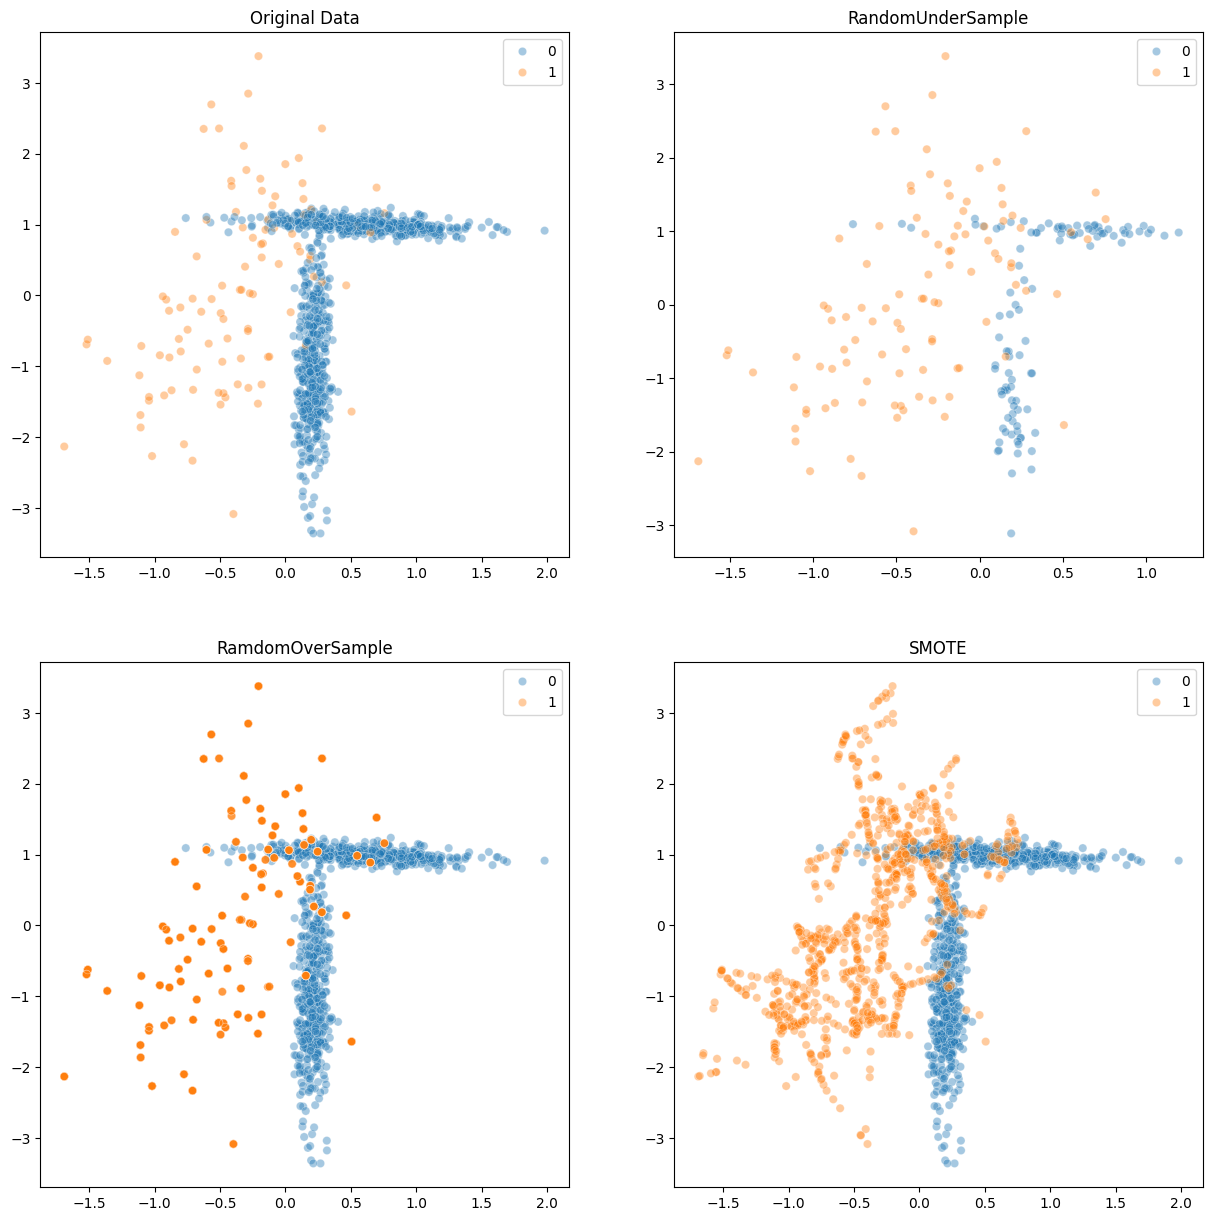

In [678]:
# 도화지의 영역을 행을 2개 열을 2개로 나눈다.
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize = (15, 15))

# 산점도 그래프를 생성
sns.scatterplot(
    x = x[:, 1], y = x[:, 2], ax=axes[0][0], hue=y, alpha = 0.4
)
sns.scatterplot(
    x = x_under[:, 1], y = x_under[:, 2], ax=axes[0][1], hue=y_under, alpha = 0.4
)
sns.scatterplot(
    x = x_over[:, 1], y = x_over[:, 2], ax=axes[1][0], hue=y_over, alpha = 0.4
)
sns.scatterplot(
    x = x_sm[:, 1], y = x_sm[:, 2], ax=axes[1][1], hue=y_sm, alpha = 0.4
)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('RandomUnderSample')
axes[1][0].set_title('RamdomOverSample')
axes[1][1].set_title('SMOTE')

plt.show()